# Notebook for performing EDA on the dataset
## Import libraries

In [7]:
import pandas as pd
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
import jellyfish

In [8]:
df = pd.read_csv("data.csv")

In [9]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


## Inspect the data and clean missing or flawed values

In [10]:
df.isnull().sum()
# Drop the unnamed company (1 out of 2253) and drop the "unnamed" column

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [11]:
df = df.dropna().drop(columns=['Unnamed: 0'])

Usually the job title is in the form of "Actual title, something else, more info". Thus, we can probably just take the first words before the first comma, or other special character to make the job titles more coherent.


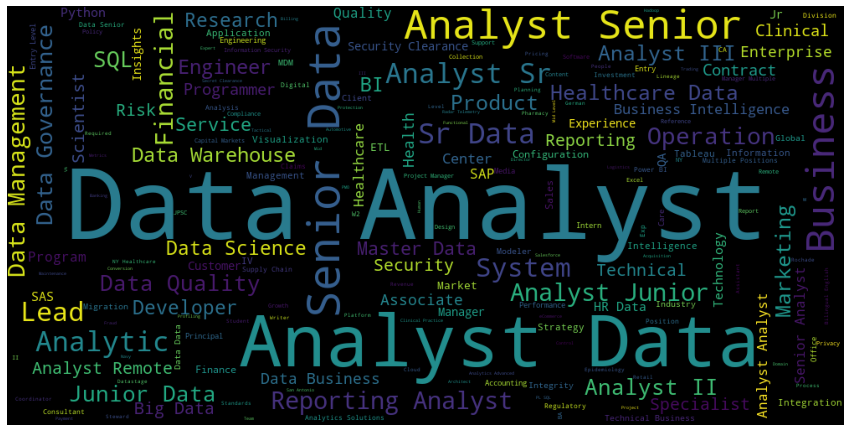

In [12]:
unique_string=(" ").join(df["Job Title"])
wordcloud = wordcloud.WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [38]:
# Top 50 titles from the wordcloud.
new_title_scores = pd.DataFrame.from_dict(wordcloud.words_.items()).iloc[0:200,]
new_title_scores.head(5)

,0,1
0,Data Analyst,1.000000
1,Analyst Data,0.472836
2,Senior Data,0.108657
3,Analyst Senior,0.090149
4,Business,0.084179


Now, lets give each job title the most similar string from the wordcloud using Levenshtein distance.

In [40]:
def find_most_similar(text,new_titles_list):
    sims = [jellyfish.levenshtein_distance(text,x) for x in new_titles_list]
    return new_titles_list[sims.index(min(sims))]


In [41]:
df["new_title"] = df["Job Title"].apply(lambda x: find_most_similar(x,new_title_scores[0]))

C:\Users\johma\AppData\Local\Temp/ipykernel_14504/2500686263.py:2: DeprecationWarning: getargs: The 'u' format is deprecated. Use 'U' instead.
  sims = [jellyfish.levenshtein_distance(text,x) for x in new_titles_list]


In [43]:
df["new_title"].value_counts().head(5)

Data Analyst             1314
Senior Analyst            219
Reporting Analyst         165
Analyst Analyst            88
Business Intelligence      57
Name: new_title, dtype: int64

Let us transform the salary estimate into a numerical value. We will be taking the mean of the salary range.

In [44]:
df["Salary Estimate"]

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2252, dtype: object